# Convergence Speed Analysis: Projected $x_t$

James Yu, 28 July 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
A_1 = np.array([
    [0.99, 0.0075, 0.0025],
    [0.0075, 0.9875, 0.005],
    [0.0025, 0.005, 0.9925]
])

A_2 = np.array([
    [0.48, 0.3, 0.22],
    [0.3, 0.52, 0.18],
    [0.22, 0.18, 0.6]
])

In [3]:
eigvals_1, U_1 = np.linalg.eig(A_1)
eigvals_1

array([1.        , 0.98066987, 0.98933013])

In [4]:
eigvals_2, U_2 = np.linalg.eig(A_2)
eigvals_2

array([1.        , 0.19416995, 0.40583005])

In [5]:
delta = 0.9
c = 1.0
T = 60
x_0 = np.array([[5.0, 10.0, 2.0]], ndmin = 2).T
x_0

array([[ 5.],
       [10.],
       [ 2.]])

# Using the projected $x_t$ in the plots and data

In [6]:
def infinite_solution(A, delta, c, x_0):
    eigvals, U = np.linalg.eig(A)
    D = np.diag(eigvals)
    I = np.identity(len(x_0))
    K_t = I
    K_sequence = [K_t]
    while True: # generate solution matrices
        K_t_new = I + (delta * c * (np.linalg.inv((delta * K_t) + (c * I)) @ K_t @ D @ D))
        K_sequence.insert(0, K_t_new)
        if np.allclose(K_t, K_t_new, 
                       rtol = np.finfo(K_t.dtype).eps, 
                       atol = np.finfo(K_t.dtype).eps):
            break
        K_t = K_t_new
        
    tilde_x_0 = U.T @ x_0
    tilde_x_t = tilde_x_0
    r_ts = []
    x_ts = [U.T @ x_0]
    K_ss = K_sequence[0]
    while True:
        L_ss = -delta * (np.linalg.inv((delta * K_ss) + (c * I)) @ K_ss @ D)
        tilde_r_t = L_ss @ tilde_x_t
        tilde_x_t_new = D @ tilde_x_t + tilde_r_t
        
        x_t_new = tilde_x_t_new
        x_ts.append(x_t_new)
        r_t = U @ tilde_r_t
        r_ts.append(r_t)
        
        if np.allclose(tilde_x_t, tilde_x_t_new, 
                       rtol = np.finfo(tilde_x_t.dtype).eps, 
                       atol = np.finfo(tilde_x_t.dtype).eps):
            break
        tilde_x_t = tilde_x_t_new
        
    return x_ts, r_ts, K_ss

In [7]:
x_sequence_1i, r_sequence_1i, K_ss_1 = infinite_solution(A_1, delta, c, x_0)
x_sequence_2i, r_sequence_2i, K_ss_2 = infinite_solution(A_2, delta, c, x_0)

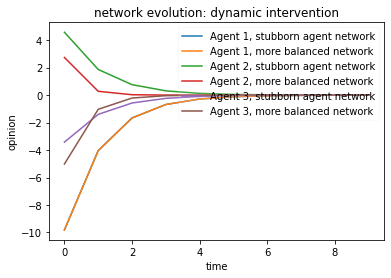

In [8]:
for i in range(3):
    plt.plot(range(10), [x_sequence_1i[j][i].item() for j in range(10)], label = f"Agent {i+1}, stubborn agent network")
    plt.plot(range(10), [x_sequence_2i[j][i].item() for j in range(10)], label = f"Agent {i+1}, more balanced network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.title("network evolution: dynamic intervention")
plt.show()

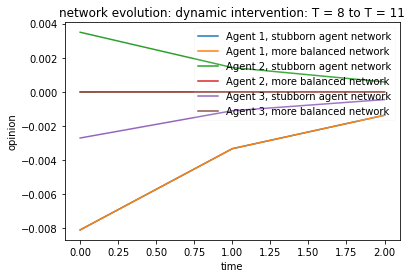

In [9]:
for i in range(3):
    plt.plot(range(3), [x_sequence_1i[j][i].item() for j in range(8, 11)], label = f"Agent {i+1}, stubborn agent network")
    plt.plot(range(3), [x_sequence_2i[j][i].item() for j in range(8, 11)], label = f"Agent {i+1}, more balanced network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.title("network evolution: dynamic intervention: T = 8 to T = 11")
plt.show()

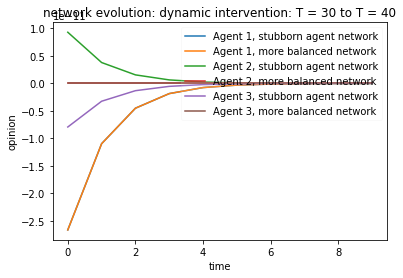

In [10]:
for i in range(3):
    plt.plot(range(10), [x_sequence_1i[j][i].item() for j in range(30, 40)], label = f"Agent {i+1}, stubborn agent network")
    plt.plot(range(10), [x_sequence_2i[j][i].item() for j in range(30, 40)], label = f"Agent {i+1}, more balanced network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.title("network evolution: dynamic intervention: T = 30 to T = 40")
plt.show()

## Direct analysis of the equation

In [11]:
from sympy import *

In [12]:
lambda_2, lambda_3, t, w_1, w_2, w_3 = symbols("lambda_2 lambda_3 t w_1 w_2 w_3")

def K_j_star(lambda_j):
    delta = 0.9
    c = 1.0
    return (delta + delta*c*lambda_j**2 - c + sqrt((c-delta-c*delta*lambda_j**2)**2 + 4*delta*c)) / (2*delta)

tilde_x_t_1 = w_1 * (c/(delta * K_j_star(1) + c))**t
tilde_x_t_2 = w_2 * ((lambda_2 * c)/(delta * K_j_star(lambda_2) + c))**t
tilde_x_t_3 = w_3 * ((lambda_3 * c)/(delta * K_j_star(lambda_3) + c))**t

In [13]:
tilde_x_t_2

w_2*(1.0*lambda_2/(0.45*lambda_2**2 + 0.948683298050514*sqrt(0.225*(0.111111111111111 - lambda_2**2)**2 + 1) + 0.95))**t

In [14]:
tilde_x_t_2.subs(lambda_2, 0.4)

0.202949016216206**t*w_2

In [15]:
tilde_x_t_2.subs(lambda_2, 0.9)

0.388944473488051**t*w_2

In [16]:
eigvals_2

array([1.        , 0.19416995, 0.40583005])

In [17]:
w_1_2 = (np.array(U_2[:, 0], ndmin = 2) @ x_0).item()
w_2_2 = (np.array(U_2[:, 1], ndmin = 2) @ x_0).item()
w_3_2 = (np.array(U_2[:, 2], ndmin = 2) @ x_0).item()
print(w_1_2, w_2_2, w_3_2)

-9.814954576223638 2.7411972377870497 -5.01522725010695


In [18]:
def x_t(t_select):
    # the eigenvalues are re-ordered in the U matrix so correspondingly re-order the indices here
    return np.array([[tilde_x_t_1.subs(t, t_select).subs(w_1, w_1_2),
                  tilde_x_t_3.subs(t, t_select).subs(lambda_3, eigvals_2[1]).subs(w_3, w_2_2),
                     tilde_x_t_2.subs(t, t_select).subs(lambda_2, eigvals_2[2]).subs(w_2, w_3_2)]], dtype = np.float64, ndmin = 2).T

In [19]:
[x_t(t).T for t in range(10)]

[array([[-9.81495458,  2.74119724, -5.01522725]]),
 array([[-4.03980243,  0.27776402, -1.03153717]]),
 array([[-1.66276915,  0.02814568, -0.21216764]]),
 array([[-0.68439021,  0.00285199, -0.04363886]]),
 array([[-0.28169272,  0.00028899, -0.00897569]]),
 array([[-1.15943780e-01,  2.92832183e-05, -1.84612853e-03]]),
 array([[-4.77220717e-02,  2.96725254e-06, -3.79713639e-04]]),
 array([[-1.96422449e-02,  3.00670080e-07, -7.80998969e-05]]),
 array([[-8.08468221e-03,  3.04667352e-08, -1.60636682e-05]]),
 array([[-3.32762812e-03,  3.08717765e-09, -3.30399200e-06]])]

In [20]:
[x.T for x in x_sequence_2i[:20]]

[array([[-9.81495458,  2.74119724, -5.01522725]]),
 array([[-4.03980243,  0.27776402, -1.03153717]]),
 array([[-1.66276915,  0.02814568, -0.21216764]]),
 array([[-0.68439021,  0.00285199, -0.04363886]]),
 array([[-0.28169272,  0.00028899, -0.00897569]]),
 array([[-1.15943780e-01,  2.92832183e-05, -1.84612853e-03]]),
 array([[-4.77220717e-02,  2.96725254e-06, -3.79713639e-04]]),
 array([[-1.96422449e-02,  3.00670080e-07, -7.80998969e-05]]),
 array([[-8.08468221e-03,  3.04667352e-08, -1.60636682e-05]]),
 array([[-3.32762812e-03,  3.08717765e-09, -3.30399200e-06]]),
 array([[-1.36964059e-03,  3.12822027e-10, -6.79568518e-07]]),
 array([[-5.63739480e-04,  3.16980853e-11, -1.39774361e-07]]),
 array([[-2.32033282e-04,  3.21194969e-12, -2.87489361e-08]]),
 array([[-9.55041218e-05,  3.25465109e-13, -5.91311113e-09]]),
 array([[-3.93091767e-05,  3.29792019e-14, -1.21621486e-09]]),
 array([[-1.61795255e-05,  3.34176453e-15, -2.50152339e-10]]),
 array([[-6.65943850e-06,  3.38619177e-16, -5.145159

In [21]:
[x.T for x in x_sequence_1i[:20]]

[array([[-9.81495458,  4.57735027, -3.42264973]]),
 array([[-4.03980243,  1.86588143, -1.40134794]]),
 array([[-1.66276915,  0.76059583, -0.57375899]]),
 array([[-0.68439021,  0.31004436, -0.23491623]]),
 array([[-0.28169272,  0.12638448, -0.09618261]]),
 array([[-0.11594378,  0.05151855, -0.03938039]]),
 array([[-0.04772207,  0.02100069, -0.01612366]]),
 array([[-0.01964224,  0.00856058, -0.00660157]]),
 array([[-0.00808468,  0.00348958, -0.0027029 ]]),
 array([[-0.00332763,  0.00142247, -0.00110666]]),
 array([[-0.00136964,  0.00057985, -0.0004531 ]]),
 array([[-0.00056374,  0.00023636, -0.00018552]]),
 array([[-2.32033282e-04,  9.63502621e-05, -7.59564608e-05]]),
 array([[-9.55041218e-05,  3.92755971e-05, -3.10991302e-05]]),
 array([[-3.93091767e-05,  1.60100502e-05, -1.27330301e-05]]),
 array([[-1.61795255e-05,  6.52623321e-06, -5.21333085e-06]]),
 array([[-6.65943850e-06,  2.66031146e-06, -2.13451302e-06]]),
 array([[-2.74100259e-06,  1.08443214e-06, -8.73941436e-07]]),
 array([[-

In [22]:
[(x1[1].item(), x2[1].item()) for x1, x2 in zip(x_sequence_1i, x_sequence_2i)]

[(4.577350269189591, 2.7411972377870497),
 (1.8658814324724378, 0.27776402035976194),
 (0.7605958284380516, 0.028145676620009743),
 (0.31004435982344325, 0.0028519860541049453),
 (0.12638447578096082, 0.00028899019066489515),
 (0.05151854956343736, 2.9283218331424314e-05),
 (0.021000688041150923, 2.9672525350184147e-06),
 (0.008560584526136132, 3.0067008028024215e-07),
 (0.003489581259695964, 3.04667351729691e-08),
 (0.0014224703150635797, 3.087177650781465e-09),
 (0.0005798465909383564, 3.1282202682289456e-10),
 (0.00023636491072068916, 3.1698085285378e-11),
 (9.635026210913557e-05, 3.2119496857807617e-12),
 (3.9275597127313144e-05, 3.254651090470151e-13),
 (1.601005016426154e-05, 3.297920190839992e-14),
 (6.52623320865869e-06, 3.341764534145181e-15),
 (2.660311457916287e-06, 3.3861917679779213e-16),
 (1.0844321413048677e-06, 3.431209641601666e-17),
 (4.4205089806145017e-07, 3.476826007302784e-18),
 (1.801947664902336e-07, 3.523048821760209e-19),
 (7.345342812979894e-08, 3.56988614743

In [23]:
[(x1[1].item() > x2[1].item()) for x1, x2 in zip(x_sequence_1i, x_sequence_2i)]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [24]:
[(x1[2].item(), x2[2].item()) for x1, x2 in zip(x_sequence_1i, x_sequence_2i)]

[(-3.4226497308104307, -5.01522725010695),
 (-1.4013479364868338, -1.0315371658033015),
 (-0.5737589860329984, -0.21216763894613486),
 (-0.23491622992567723, -0.04363886102050649),
 (-0.09618260702817083, -0.00897568639886009),
 (-0.03938039486527772, -0.0018461285296338136),
 (-0.016123658400015867, -0.0003797136393224196),
 (-0.006601568142975217, -7.80998969319193e-05),
 (-0.0027029040720871617, -1.6063668167571868e-05),
 (-0.0011066598518231468, -3.3039920042762643e-06),
 (-0.0004531037709716159, -6.795685176290322e-07),
 (-0.0001855159260819626, -1.3977436069905987e-07),
 (-7.595646082628645e-05, -2.8748936129345267e-08),
 (-3.109913021001884e-05, -5.913111134513905e-09),
 (-1.2733030071419555e-05, -1.2162148585881816e-09),
 (-5.213330845743175e-06, -2.501523392004146e-10),
 (-2.1345130228022152e-06, -5.14515937423093e-11),
 (-8.739414357775634e-07, -1.0582617404599725e-11),
 (-3.5782102287961556e-07, -2.176643773039138e-12),
 (-1.4650396373608063e-07, -4.476943589258725e-13),
 (-

In [25]:
[(x1[2].item() < x2[2].item()) for x1, x2 in zip(x_sequence_1i, x_sequence_2i)]

[False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]